This is an [jupyter](http://jupyter.org) notebook.
Lectures about Python, useful both for beginners and experts, can be found at http://scipy-lectures.github.io.

Open the notebook by (1) copying this file into a directory, (2) in that directory typing 
jupyter-notebook
and (3) selecting the notebook.

# <font color= 'blue'>Blind Source Separation</font>
## Independent Component Analysis

***
A notebook by ***Shashwat Shukla*** and ***Dhruv Ilesh Shah***
***

In this tutorial we will learn how to solve the Cocktail Party Problem using Independent Component Analysis(ICA).
We will first take a look at Principle Component Analysis(PCA). The limitations of PCA will naturally lead to an understanding of ICA does.

# Overview
## The Cocktail Party Problem(CPP)

So what is the Cocktail Party Problem? 
Imagine you are at a party where a lot of different conversations are happening in different parts of the room. As a listener in  the room, you are receiving sound from all of these conversations at the same time. And yet, as humans, we possess the ability to identify different threads of conversation and to focus on any conversation of our choice. How do we do that? And how can we program a computer to do that?
So this is essentially the Cocktail Party Problem: Given **m** sources(conversations at the party for example), and some number of sound receivers, separate out the different signals. (We will talk about how many receivers we need later.)

We need to make some mathematical assumptions and also phrase the problem more formally.

### The data

So first of all, our signals here are the sounds coming from different sources. 
At every (uniformly spaced) discrete interval of time we record **m** samples, one at each of our **m** microphones.

Note the implicit assumptions that we have made here:

**1)** There are as many microphoneses as there are independent conversations(sources) going on in the room. This assumption allows us to come up with a method to retrieve all the m independent signals. We can say that our system is **critically determined**(and is not under- or over- determined). Henceforth, we shall only consider this case in the tutorial.

**2)** Each microphone records a reasonably distinct combination of the independent signals. This simply amounts to not keeping two microphones too close to each other. Due to practical computational limits (see floating point math), it is always best to have easily distinguishable recordings. 

How are we recording this data? We simply record the amplitude of the sound at each instant. Recording the pressure amplitude is a convenient thing to do(and is what a microphone does. A transducer then converts the pressure amplitude to a voltage).
Note that we are recording the signals at discrete intervals of time (at a rate assumed to be greater than the Shannon Sampling rate)and will be working only in the time domain with these discrete signals.

One very important thing: We assume that the sound that any receiver records is a **linear combination** of sounds from the different sources. This is a reasonable assumption to make as pressure adds linearly. Each receiver will receive a different linear combination: If the first receiver is closer to a particular speaker than the second receiver, then the linear weight of this speaker will be proportionately higher for the first receiver.

![Cocktail Party Problem](Notebook/cocktail_1.png)


We further assume that each source is **statistically independent** with respect to all the other sources. We will look at a mathematical interpretation of statistical independence of two signals later. Within the context of the Cocktail Party parable an intuitive understanding of this assumption follows naturally, as the conversations happening in different parts of the room are independent of each other. Hence, knowing the signal at a particular instant from one source does not allow us to predict the value of the signal from any other source at that instant. They are independent variables.

This is the key assumption in Blind Source separation that allows to solve the problem.

We are also making one vital assumption about the sources of the signals: that they are non-Gaussian. We will look at what that means and why it matters in the section on Statistical Independence.

### The math

We will index our microphones from **1** to **m**. 

The signal received by the microphone labelled **i** over the entire time of recording will be denoted by $X_{i}$. A particular sample of this recorded signal, recorded at the time index **j** will then be denoted by $X_{i}^{j}$. 

Hence, if the samples of the signals recorded over time be **N**, then $X_{i}$ can be seen to be a row vector in **N**-dimensional space. It's jth element is given by $X_{i}^{j}$.

We had said that we have **m** microphones. Hence **i** in the above description ranges from **1** to **m**.

If we stack up these row vectors, we will get an **m x N** matrix whose ith row corresponds to the samples recorded by a particular microphone. A 'vertical slice' of this matrix, i.e a column corresponds to all the samples recorded at a given instant of time, indexed by the indices of the corresponding microphone.

Let us call this data matrix **X**.

To reiterate, $X_{i}^{j}$ corresponds to the sound sample recorded by the **i**th mike at the time (indexed by) **j**. 

Let us now similarly define matrices corresponding to the sources that we wish to finally recover.
The indices for the independent sources also go from **1** to **m**.

Let $S_{i}$ denote the signal generated by the **i**th independent source that we wish to recover (the **i**th conversation in the room). It is defined as a row vector.

$S_{i}^{j}$ is then the **j**th time sample of this signal. 

Again, we vertically stack up these row vectors to get a **m x N** matrix denoted by **S**.

Now that we have defined our data and the signals that we wish to retrieve, we will describe the (assumed) relationship between the two. Note that we had assumed that the independent sources add **linearly** to give the recorded signals. 

This means that each $X_{i}$ is some linear combination of the vectors $S_{1}$ through $S_{m}$.

Putting it all together, we conclude that $X = AS$ ; for some **m x m** matrix **A**, called the mixing matrix.

Our objective is to then find an "un-mixing" matrix **W** that satisfies $S = WX$.

If we know this **W**, as we already have **X**, we can calculate **S** by a direct multiplication. 

![The Problem](Notebook/cocktail_2.jpg)


### Outline of solution

Our objective is to find the matrix **W**. As we have assumed that the number of microphones is equal to the number of independent conversations, it turns out that the matrix **A** is invertible and hence **W** is just the inverse of **A**. 

Hence, it suffices to find **A**. We will employ [Singular Value Decomposition(SVD)](https://www.wikiwand.com/en/Singular_value_decomposition) on the matrix **A**.

![SVD](Notebook/SVD.gif)

Hence, $A = UDV^{*}$ for orthogonal matrices **U**, **V\*** and diagonal matrix **D**. 

Note that **V\*** is the conjugate transpose of **V**. Here the conjugate transpose is equivalent to the transpose because we are only dealing with real signals and their linear combinations.

We will then determine each of **U**, **D**, **V\*** by considering the covariance matrix of **x** and exploiting the independence of the source signals.

The details follow.
***

## <font c>Covariance

An important term in the concept of statistics is *covariance*, which is a measure of how much two random variables change _together_. Covariance provides a measure of the strength of the correlation between two or more sets of random variates. The covariance for two random variates X and Y, each with sample size N, is defined by the expectation value:
$$ cov (X,Y) = \langle(X-\mu_x) (Y-\mu_y)\rangle \\
=\langle X \rangle \langle Y \rangle - \mu_x \mu_y$$
where $\mu_x = \langle X \rangle$ and $\mu_y = \langle Y \rangle$ are the respective means.  
For uncorrelated variates, $ \langle X Y \rangle = \langle X \rangle \langle Y \rangle $ and hence,
$$ cov(X,Y) =  \langle X Y \rangle - \mu_x \mu_y = \langle X \rangle \langle Y \rangle - \mu_x \mu_y = 0 $$
However, if the variables are correlated in some way, then their covariance will be nonzero. In fact, if $cov(X,Y)>0$, then Y tends to increase as X increases, and if $cov(X,Y)<0$, then  Y tends to decrease as X increases. Note that while statistically independent variables are always uncorrelated, the converse is not necessarily true.

As you can see, covariance can be a good metric to analyse the dependence of two datasets. To read more about covariance, follow [this link.](http://mathworld.wolfram.com/Covariance.html)

As a special case, substituting $ X = Y $  gives $$cov(X,X) = \langle X^2 \rangle - \langle X \rangle ^2 \\ =\sigma^2_X$$
where $\sigma_X$ denotes the _standard deviation_. Thus, $cov(X,Y)$ reduces to the statistical variance for this case.


Given a dataset vector $X$ _(nx1 vector)_, the covariance of $X$ is given by $$ C_x= (X-\mu_x)(X-\mu_x)^T $$
This matrix $C_x$ has very interesting properties, which we will be exploiting in the upcoming sections. This [document](http://www.robots.ox.ac.uk/~davidc/pubs/tt2015_dac1.pdf) would be an interesting read.
***

Now that we have the necessary tools required, let us dive into some algorithms that involve manipulating the information matrix and separating them into components. The first such algorithm is the PCA.
## Principle Component Analysis

_Principal Component Analysis (PCA)_ is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of principal components is less than or equal to the number of original variables. This transformation is defined in such a way that the first principal component has the **largest possible variance** (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

What does this mean? Let's visualise the problem at hand.  
Let us say you are given a dataset of point in the two-dimensional plane like the plot given below. ![](https://cmp.felk.cvut.cz/cmp/software/stprtool/examples/pca_example.gif)
The given dataset is two-dimensional and has a set of points arranged in a roughly elliptical form. What the PCA algorithm does is that it identifies the first principle component of the data, that is, the direction along which the _variance_ of the data is maximum. This is the direction indicated by the red line. The second principle component is the one orthogonal to this, along the approximate minor axis of the dataset. Another such example of PCA on a 2D dataset is shown below. ![](http://www.visiondummy.com/wp-content/uploads/2014/05/correlated_2d.png)
Here, the green line shows the vector corresponding to the first principle component, and pink shows the second component. To visualise how PCA can be applied on higher dimensional datasets, check out [this page](http://setosa.io/ev/principal-component-analysis/).

The PCA has various applications, some of which have been listed below.
* To identify the most important feature(s) of a multivariate function.
* Reduce dimensionality of data for saving memory, preserving maximum information.
* Speed up processes (regression, for example) by ignoring the features with low variance.
* As a pre-processing technique for further statistical methods, increasing efficiency.

Before we go ahead with understanding PCA, it is important to consider the following ** assumptions and limitation ** of PCA:
1. PCA assumes the dataset to be a linear combination of the variables.
2. There is no guarantee that the directions of maximum variance will contain good features for discrimination.
3. PCA assumes that components with larger variance correspond to interesting dynamics and lower ones correspond to noise.
4. Output vectors of PCA are orthogonal, which means that the principal components are _orthogonal_ to each other.
5. PCA requires the data to be _mean normalized_ and _univariate_, as it is highly susceptible to unscaled variables.
6. Since it assumes data to be uncorrelated and accurate, it is _vulnerable to outliers_ and hence may produce incorrect results.

Here, we see that PCA breaks down the dataset into uncorrelated (hence, orthogonal) components. 
 ### <u>The Algorithm </u>

Principle component analysis relies on the property that the eigenvectors of the covariance matrix for a dataset $X$ represent a new set of orthogonal components that are the principle components of the dataset. Mathematically, given the covariance matrix $C_x$, the matrix $U = eig(C_x)$ which returns the eigenvectors is the desired matrix.  
Another method to do this is *singular value decomposition* of the covariance matrix. In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix. It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any $m \times n$ matrix via an extension of polar decomposition. The theory behind SVD is exhaustive and beyond the scope of this tutorial; you can find some interesting stuff [here.](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm) For our use, SVD is called in a programming language like Matlab or Python as $$ [U, S, V] = svd(C_x) $$
Such that $C_x$ satisfies $ C_x = USV^T $. Note that $U$ here refers to the same matrix of orthogonal eigenvectors.

Thus, $U$ here is an $n\times n$ matrix with its column vectors as the eigenvectors of $C_x$.
* If we aim to perform data compression, define a matrix $U_{reduced} = U[:,1:k]$ which stores the first $k$ principle components. Thus, the required dataset with reduced dimensionality $k$ can be given by $X_{new} = U_{reduced}^TX$.
* If we do not want to compress data but simply express it in terms of principle/orthogonal components, we have $X_{new} = U^TX$

## PCA vs ICA

Now that we have seen what PCA is, let us see how it can be applied in our case - if at all.  
We have seen that the basis on which PCA separates out the components is *orthogonality* and *variance*. Drawing parallels to the Cocktail Party Problem, there seems to be an issue. Orthogonality sure is a measure of independence of two datasets (vectors), but it is not the only measure and as it turns out, it is not applicable in the case of CPP. Two different sound signals need not be orthogonal, even if they are independent and this can be seen by simply generating a counter example. _(Here, orthogonal refers to **zero** inner product.)_ The very fact that independent signals needn't be orthogonal eliminate the possibility of using PCA. Further, PCA identifies the separated components on the basis of _variance_, which according to Information Theory is a very shallow metric for decorrelating components. Statistical independence of the third or fourth order is generally preferred as a metric - what this means is that we must study deeper features and analyse correlations, but let's leave that for now.   
Given below is the simplest way to illustrate how PCA fails due to the orthogonality condition on principle components. ![PCAvICA](http://i.stack.imgur.com/ySEOY.png)
Despite the two branches being independent, PCA would not identify them so because it doesn't separate out _independent_ components, but _principle_ ones based on orthogonality and variance measures. ICA, as the name suggests, looks for _independent_ components and not any dependent variable - hence avoiding side-effects! How it does this is by using a metric for ***statistical independence***, described later, and then picking a model that minimizes this dependence. Before we can get to that, let's look at the pre-processing to be done on the data to ensure optimal results in ICA. 

## Preprocessing for ICA

First, let us consider the basic statement of ICA. $$ x = As \\ s = Wx $$ Where $s$ refers to the source signals, $A$, the _mixing matrix_ and $x$, the signal we receive at microphones(say) and $W = A^{-1}$ 
Given below are the pre-processing stages performed:
* **Centering**: The most basic and necessary preprocessing is to center ${\bf x}$, i.e. subtract its mean vector  ${\bf m = E\{x\}}$ so as to make ${\bf x}$ a zero-mean variable. This also implies that ${\bf s}$ is a zero-mean variable, as can be seen by taking expectation on both sides, above. This preprocessing is made solely to simplify the ICA algorithms: It does not mean that the mean could not be estimated. After estimating the mixing matrix ${\bf A}$ with centered data, we can complete the estimation by adding the mean vector of ${\bf s}$ back to the centered estimates of ${\bf s}$. The mean vector of ${\bf s}$ is given by  ${\bf A}^{-1}
{\bf m}$, where ${\bf m}$ is the mean that was subtracted in the preprocessing.


* **Whitening**: Another useful preprocessing strategy in ICA is to first whiten the observed variables. This means that before the application of the ICA algorithm (and after centering), we transform the observed vector ${\bf x}$linearly so that we obtain a new vector  $\tilde{{\bf x}}$ which is white, i.e. its components are uncorrelated and their variances equal unity. In other words, the covariance matrix of  $\tilde{{\bf x}}$ equals the identity matrix. A _whitening transformation_ is a linear transformation that transforms a vector of random variables with a known covariance matrix into a set of new variables whose __covariance is the identity matrix__ meaning that they are uncorrelated and all have _variance unity_. $$ C_{\tilde{x}} = \tilde{x}\tilde{x}^T = I $$ The math behind whitening involves a greater understanding of eigenvectors and matrices, which we shall ignore for the purpose of this tutorial. Let us fast-forward to how whitening can be done on a given dataset. The whitening transformation is always possible. One popular method for whitening is to use the [eigen-value decomposition (EVD)](http://mathworld.wolfram.com/EigenDecomposition.html) of the covariance matrix  $C_{\tilde{x}} ={\bf E}{\bf D}{\bf E}^T$, where ${\bf E}$ is the orthogonal matrix of eigenvectors of  $ C_{\tilde{x}} $ and ${\bf D}$ is the diagonal matrix of its eigenvalues,  ${\bf D}= \mbox{diag}(d_1,...,d_n)$. Note that  $E\{{\bf x}{\bf x}^T\}$can be estimated in a standard way from the available sample $x(1),...,x(T)$. Whitening can now be done by $$ \tilde{x} = ED^{-1/2}E^Tx$$
where the matrix  ${\bf D}^{-1/2}$is computed by a simple component-wise operation as  ${\bf D}^{-1/2}=\mbox{diag}(d_1^{-1/2},...,d_n^{-1/2})$. It is easy to check that now  $C_{\tilde{x}}={\bf I}$.

It is important to note that the whitening transformation changes the matrix $A$ corresponding to the $x$, and hence $$ \tilde{x} = ED^{-1/2}E^TAs = \tilde{A}s$$
The utility of whitening resides in the fact that the new mixing matrix  $\tilde{{\bf A}}$ is orthogonal. How this affects the data is a little complicated to explain, but I will attempt to illlustrate it below.  
Consider a two-dimensional dataset as given below, with _uncorrelated/independent_ variables, along the sides of the parallelogram. ![Before Whitening](http://sccn.ucsd.edu/~arno/ica/m1m2whit.jpg)
Evidently, this data has the two independent vectors as the sides of the parallelogram, but when passed into the algorithm, since the vectors are not orthogonal, they might end up showing unnatural dependencies which may not really exist. Hence, we perform whitening of the data to give something that looks like this: ![After Whitening](http://sccn.ucsd.edu/~arno/ica/whiten.jpg)
Note that we haven't lost any __information__ in the above transformation, nor have we created or destroyed any existing correlations. But this new dataset ($\tilde{x}$) is bound to perform better on ICA algorithms. In the rest of this tutorial, we assume that the data has been preprocessed by centering and whitening. For simplicity of notation, we denote the preprocessed data just by ${\bf x}$, and the transformed mixing matrix by ${\bf A}$, omitting the tildes.

## Statistical Independence

This section gives a brief description of statistical independence and it's interpretation in the context of this problem. 
Recall how we looked at an intuitive explanation. We said that voices are independent because listening to one won't allow us to predict the other. 

To exploit this property mathematically, we construct the **probability density functions(pdf)** for each of the signals that our **m** microphones have recorded. 

Why would we ever think of doing that? Well, for a number of pragmatic reasons. Statistical methods that work with density functions are very well developed and extremely powerful. 

It also makes the math simpler. How you ask? 

Well, notice that if we are representing a signal by it's probability density function *alone*, we are saying that at any given time, the value of **the signal is simply a draw of a random variable with this particular pdf.** (What this means is that we are basically discarding/not keeping track of the local correlation of the signal's contiguous values.)

In the context of the Cocktail Party Problem, we use pdfs to quantify statistical independence. There are many ways of quantifying the independence of two random variables if their pdfs are known. This is why we are working with probability density functions. 

Here comes an extremely important point: While solving the Cocktail party problem, we assume that all the source signals that we wish to recover are non-Gaussian.

First of all, what do we mean by that? We mean that the pdf of each source signal is not a Gaussian function/distribution.

This might seem like an arbitrary and questionable assumption at first. 

We invoke Information theory to justify our assumption. Simply put, there is a result in Information theory that says that the **Gaussian distribution has the greatest possible entropy (for a fixed variance of the distribution).** Entropy in our context is just disorder. The source signals do have order, as they contain lots of information. If they were purely Gaussian, then the signals would just sound like (Gaussian) noise. 

We are not going to prove this result here. The mathematics is very involved and doesn't really shed any light on the present problem. However, an intuitive understanding of why this result *should be right* can be acquired by considering the famous Galton box(bean machine).

![Galton Box GIF](http://i.makeagif.com/media/10-20-2015/smUCoA.gif)
![Galton Box](Notebook/galton_board.jpg)
This is the epitome of a random process(that contains no information) and the fact that it has a Gaussian distribution is confirmation(if not justification) of the fact that the Guassian distribution has the greatest entropy. 


Hence we assume that the original source signals have non-Gaussian distributions.

This revelation about the nature of the pdfs of the source signals actually allows us to solve the entire problem! We reiterate that each of the recorded signals is a linear sum of the original source signals. We now invoke the **Central Limit Theorem**.

The central limit theorem says that the pdf (of the average) of the sum of independent random variables, tends to a Gaussian distribution, as the number of random variables tend to infinity. Why is this important here? Well, we have assumed that the source signals are non-Gaussian independent variables and that the recorded signals are linear weighted sums of these non-Gaussian variables. By the Central Limit Theorem, the sum of non-Gaussian variables is more Gaussian than the individual variables. Hence, the recorded signals are more Gaussian than the source signals!  

We finally have a way to recover our original signals. Remember that we are trying to *linearly transform* the recorded signals back to the source signals. Thus, now we have to just find the linear transformation that minimises the "Gaussian nature" of the transformed signals. The signals that have the least "Gaussian nature" simply correspond to our source signals.

Notice that I have put "Guassian nature" in quotes. This is because we have not yet quantified deviations from a Gaussian distribution. Indeed, this is precisely where FOBI and fastICA (and other ICA implementations) differ from one another. The steps that we have outlined in the previous sections apply to both. But the subsequent sections elucidate two different approaches to quantifying deviations from a Gaussian distribution and the details of the solutions to the Cocktail Party Problem formulated based on them.


## fastICA



## FOBI

FOBI stands for Fourth Order Blind Identification. 

As the name suggests, it is based on considering fourth order moments and using them as a metric for Gaussianity. 
Covariance, variance and the covariance matrix are second order moments. 
Fourth order moments are usually referred to by the term kurtosis. There are other ICA methods that explicitly work with kurtosis, but not so with FOBI. 

FOBI is a very elegant method that works without the need to search a solution space for the indepenedent components(as is the case with fastICA and other negentropy or maximum-likelihood based ICA approaches). Rather, it provides an explicit algebraic formula for the independent components. 

It has some striking and appealing similarities to PCA. FOBI is based on the following amazing fact:

**The weights of the independent components are the eigenvectors of the matrix $cov(|X'|X')$. **

The statement requires some explanation. 
$X'$ is the matrix obtained after preprocessing $X$ (mean-centered and whitened).

$|X'|$ needs to be explained. Remember that each column of $X'$ corresponds to the (whitened) set of amplitudes recorded at some instant of time by the **m** microphones. If we take this column to be a vector, then the norm (aka the modulus) of this vector is well defined. We find the norm of each column of **X'** and put these calculated norms in a row matrix. This is the matrix $|X'|$. 
Hence, $|X'|$ is simply the norm of the matrix $X$ taken along the "column-axis".

But here comes a caveat: The matrix $|X'|X'$ is not formed by the normal matrix multiplication between $|X'|$ and $X'$. We have written it this way only for notational convnenience. Instead, we are using the elements of $|X'|$ as weights for the columns of $X'$. That is, the matrix $|X'|X'$ is formed as follows:

The **i**th column of $|X'|X'$ is formed by a scalar multiplication of the **i**th element of the **1 x m** row matrix $|X'|$ with the **i**th column of the **m x n** matrix $X'$ (each element within this column is thus multiplied by the same scalar value equal to the **i**th element of $|X'$).   

Hence, $|X'|X'$ is a weighted version of $X'$. It is easy to think of each column of $X'$ as a vector in an m-dimensional space. Then $|X'|$ contains the norms of the **m** columns of $X'$ i.e vectors. Multiplying each vector (column) by it's norm and storing these column vectors as columns in a new matrix yields $|X'|X'$.

And what does the statement itself mean? Well, remember how we said that $X = AS$. After whitening, we can say that $X' = A'S'$.
Here, $S'$ corresponds to the source signals itself, but their amplitude has been normalised. (Recall how ICA can only recover the signals upto to a multiplicative factor.)  

The columns of $A'$ are the weights being referred to in the statement above. They are called weights because the each row of $S'$ is a source signal. Upon performing matrix multiplication between $A'$ and $S'$, we can see that $X' = \sum_{1}^{m}A'_{i}S'_{i}$. Note that $A'_{i}$ are column vectors and $S'_{i}$ are row vectors. Hence, the columns of $A'$ act as weights for the source signals. 

Hence, FOBI allows us to directly compute the matrix $A'$ which as expected, turns out to be orthogonal. (The result says that the columns of $A'$ are orthogonal eigenvectors of the matrix $cov(|X'|X')$. Hence, $A'$ is an orthogonal matrix.) Finding the signals is now trivial. $S' = A'^{-1}X' = A'^{T}X'$. (The inverse of an orthogonal matrix is simply it's transpose.)

Recall that in PCA, the principal components were eigenvectors of the matrix $cov(X)$ and they were all orthogonal. Here, the columns of $A'$, which are the weights for the source signals are the eigenvectors of the matrix  $cov(|X'|X')$. And the weights are orthogonal to one another! 

The proof of this result and a good explanation of the FOBI algorithm can be found in the original paper by the inventor of the FOBI algorithm Jean Cardoso, [here](http://perso.telecom-paristech.fr/~Cardoso/Papers.PDF/icassp89.pdf). The notation used in the paper is rather different from the one that we have been using so far and can be rather confusing. The proof itself is however extremely elegant. 

Also, refer to the paper to better understand why it involves fourth order moments. Basically, if $X'$ were a simple vector, then $cov(|X'|X')$ is fourth order in $X'$. This extends to $X'$ being a matrix.

So the FOBI algorithm in summary is:  

1) Obtain the data matrix *X*.

2) Subtract off the mean to center *X*.

3) Whiten the matrix *X* to obtain the matrix *X'*.

4) Compute the matrix  $cov(|X'|X')$. 

5) Find the eigenvectors of  $cov(|X'|X')$.

6) Store the eigenvectors as columns of a matrix $Y$. ($Y$ is just $A'$)

7) Retrieve the original signals as $S' = Y^{T}X'$. 


The code for the solvong the Cocktail Party Problem based on the FOBI algorithm is given below. In the code, we have used slightly different notation in some places. For instance, x for X and xn for X'. 

Sampling rate =  8000
Data type is  uint8
Number of samples:  50000


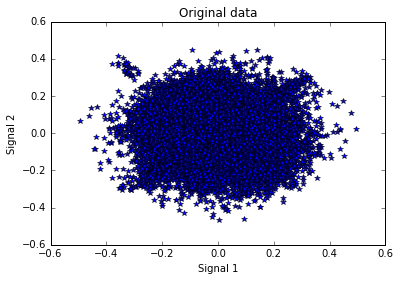

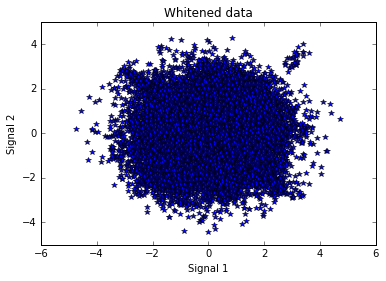

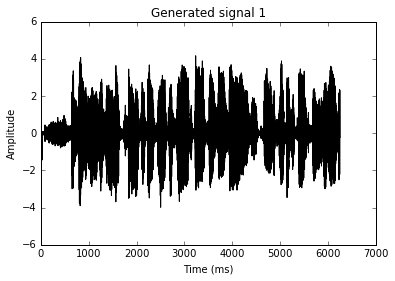

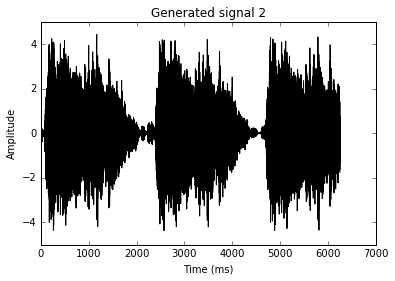

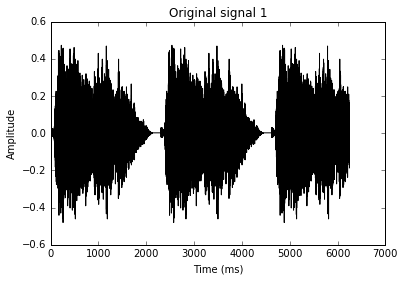

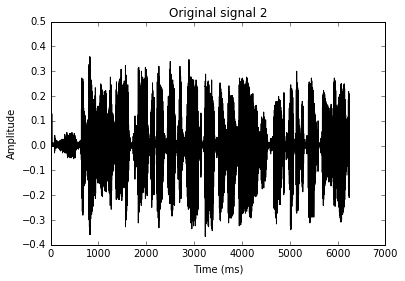

In [2]:
%matplotlib inline

"""
Cocktail Party Problem solved via Independent Component Analysis.
The Fourth Order Blind Identification(FOBI) ICA is implemented here.
"""
# Import packages.
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import linalg as LA

# Input the data from the first receiver.
samplingRate, signal1 = wavfile.read('FOBI/Sounds/mix1.wav')
print "Sampling rate = ", samplingRate
print "Data type is ", signal1.dtype

# Convert the signal so that amplitude lies between 0 and 1.
signal1 = signal1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# Output information about the sound samples.
a = signal1.shape
n = a[0]
print "Number of samples: ", n
n = n * 1.0

# Input data from the second receiver and standardise it's amplitude.
samplingRate, signal2 = wavfile.read('FOBI/Sounds/mix2.wav')
signal2 = signal2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

# x is our initial data matrix.
x = [signal1, signal2]

# Plot the signals from both sources to show correlations in the data.
plt.figure()
plt.plot(x[0], x[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Original data")

# Calculate the covariance matrix of the initial data.
cov = np.cov(x)
# Calculate eigenvalues and eigenvectors of the covariance matrix.
d, E = LA.eigh(cov)
# Generate a diagonal matrix with the eigenvalues as diagonal elements.
D = np.diag(d)

Di = LA.sqrtm(LA.inv(D))
# Perform whitening. xn is the whitened matrix.
xn = np.dot(Di, np.dot(np.transpose(E), x))

# Plot whitened data to show new structure of the data.
plt.figure()
plt.plot(xn[0], xn[1], '*b')
plt.ylabel('Signal 2')
plt.xlabel('Signal 1')
plt.title("Whitened data")

# Perform FOBI.
norm_xn = LA.norm(xn, axis=0)
norm = [norm_xn, norm_xn]

cov2 = np.cov(np.multiply(norm, xn))

d_n, Y = LA.eigh(cov2)

source = np.dot(np.transpose(Y), xn)

# Plot the separated sources.
time = np.arange(0, n, 1)
time = time / samplingRate
time = time * 1000  # convert to milliseconds

plt.figure()
plt.plot(time, source[0], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 1")

plt.figure()
plt.plot(time, source[1], color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Generated signal 2")

# Plot the actual sources for comparison.
samplingRate, orig1 = wavfile.read('FOBI/Sounds/source1.wav')
orig1 = orig1 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.figure()
plt.plot(time, orig1, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 1")

samplingRate, orig2 = wavfile.read('FOBI/Sounds/source2.wav')
orig2 = orig2 / 255.0 - 0.5  # uint8 takes values from 0 to 255

plt.figure()
plt.plot(time, orig2, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')
plt.title("Original signal 2")
